In [68]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal
%matplotlib inline

def plot_filtered_pulse(pulselength=5e-9,windowsize=8,max_freq=200e6,min_freq=0.1e6,n=100000,additional_label='',ax=None,**kwargs):
    if ax==None:
        ax=plt.gca()
    x=np.linspace(-windowsize*pulselength,windowsize*pulselength,n)
    timestep=pulselength*2*windowsize/n
    y=np.piecewise(x, [np.abs(x) >= pulselength/2], [0, 1])
    # plt.plot(x,y)
    yfft=np.fft.fft(y)
    print(yfft)
    freq=np.fft.fftfreq(x.shape[-1],d=timestep)
    plt.figure()
    plt.semilogy(freq,np.abs(yfft))

    filtyfft=np.zeros(yfft.shape)
    for i in range(len(freq)):
        if np.abs(freq[i])>=min_freq and np.abs(freq[i])<=max_freq:
            filtyfft[i]=yfft[i]
        else:
            filtyfft[i]=0

    plt.semilogy(freq,np.abs(filtyfft))
    # plt.xlim([-8/pulselength,8/pulselength])
    plt.ylim([5e-1,max(np.abs(yfft))*2])
    plt.xlabel('frequency(Hz)')
    plt.ylabel('amplitude (a.u.)')
    yfilt=np.fft.ifft(filtyfft)
    ax.plot(x,yfilt,label='{:.1f}ns Pulse {:.3f}MHz-{:.0f}MHz {}'.format(pulselength/1e-9,min_freq/1e6,max_freq/1e6,additional_label),**kwargs)
    ax.set_xlabel('time (s)')
    ax.set_ylabel('amplitude')
    ax.legend(fontsize=7,loc='lower center')

def plot_filtered_pulse_butter(pulselength=5e-9,windowsize=8,max_freq=200e6,min_freq=0.1e6,n=100000,additional_label='',ax=None,**kwargs):
    if ax==None:
        ax=plt.gca()
    x=np.linspace(-windowsize*pulselength,windowsize*pulselength,n)
    timestep=pulselength*2*windowsize/n
    y=np.piecewise(x, [np.abs(x) >= pulselength/2], [0, 1])
    # plt.plot(x,y)
    b, a = signal.butter(2, [min_freq/(1/(2*timestep)), max_freq/(1/(2*timestep))], btype='band')

    # Apply filter
    filtered_pulse = signal.lfilter(b, a, y)  # Causal filtering
    ax.plot(x,y,label='{:.1f}ns Pulse'.format(pulselength/1e-9),**kwargs)
    ax.plot(x,filtered_pulse,label='{:.1f}ns Pulse {:.3f}MHz-{:.0f}MHz {} butterworth'.format(pulselength/1e-9,min_freq/1e6,max_freq/1e6,additional_label),**kwargs)
    ax.set_xlabel('time (s)')
    ax.set_ylabel('amplitude')
    ax.set_ylim([-1,2])
    ax.legend(fontsize=7,loc='lower center')

    

[ 1562.        +0.j         -1561.37318461-0.04905199j
  1559.49364393+0.09798588j ... -1556.36409286+0.14668386j
  1559.49364393-0.09798588j -1561.37318461+0.04905199j]


C:\Users\justi\AppData\Local\Temp\ipykernel_16020\860025430.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  filtyfft[i]=yfft[i]
C:\Users\justi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\justi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


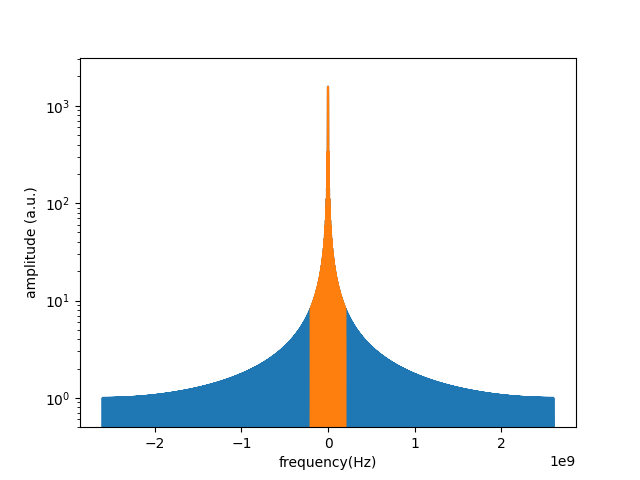

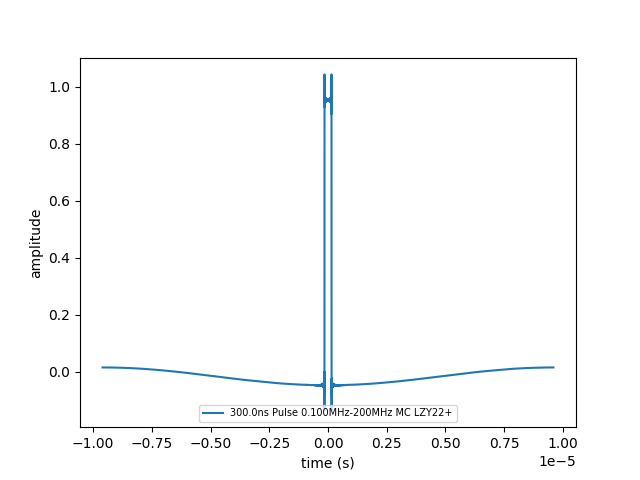

In [52]:
%matplotlib widget
plt.close('all')
fig,ax=plt.subplots()
plot_filtered_pulse(pulselength=300e-9,min_freq=0.1e6,max_freq=200e6, additional_label='MC LZY22+',ax=ax)
plt.show()

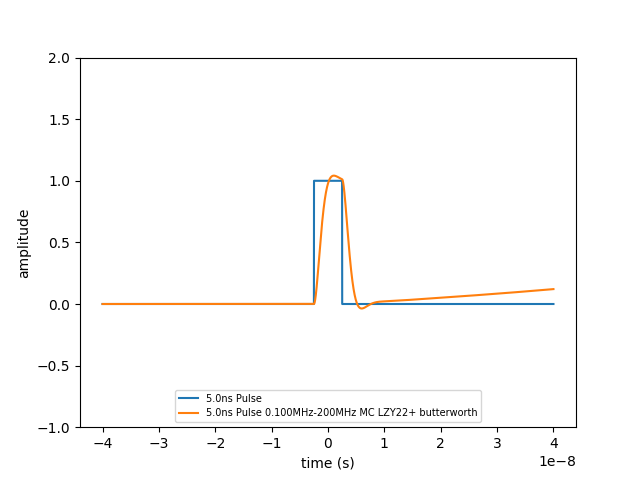

In [69]:
%matplotlib widget
plt.close('all')
fig,ax=plt.subplots()
plot_filtered_pulse_butter(pulselength=5e-9,min_freq=0.1e6,max_freq=200e6, additional_label='MC LZY22+',ax=ax)
plt.show()